<a href="https://colab.research.google.com/github/Nargiz-chess/Solar_forecasting/blob/main/Autoregression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Mount google drive
from google.colab import drive
drive.mount('/content/drive')

from pandas import read_csv
import pandas as pd
import datetime as dt
import matplotlib
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt


path = '/content/drive/MyDrive/Master_thesis/Datasets/Merged(GER+weather).csv'

Mounted at /content/drive


In [ ]:
df = read_csv(path, header =0, index_col=0) 
df.index = pd.to_datetime(df.index, utc=True)

df.head()

,cet_cest_timestamp,DE_KN_industrial1_pv_1,DE_KN_industrial1_pv_2,DE_KN_industrial2_pv,DE_KN_industrial3_pv_facade,DE_KN_industrial3_pv_roof,DE_KN_residential1_pv,DE_KN_residential3_pv,DE_KN_residential4_pv,DE_KN_residential6_pv,Berlin_time,Year,Month,Season,Week,Day,Year_day,Hour,local_time,radiation_surface
utc_timestamp,,,,,,,,,,,,,,,,,,,,
2016-02-01 05:00:00+00:00,2016-02-01T06:00:00+0100,0.00,0.000,0.000,0.000,0.000,0.000,NaN,0.000,0.000,2016-02-01 06:00:00+01:00,2016,2,1,5,1,32,6,2016-02-01 06:00,0.000
2016-02-01 06:00:00+00:00,2016-02-01T07:00:00+0100,0.00,0.000,0.000,0.000,0.000,0.000,NaN,0.000,0.000,2016-02-01 07:00:00+01:00,2016,2,1,5,1,32,7,2016-02-01 07:00,0.467
2016-02-01 07:00:00+00:00,2016-02-01T08:00:00+0100,0.00,0.000,0.692,0.067,0.007,0.291,NaN,0.367,0.000,2016-02-01 08:00:00+01:00,2016,2,1,5,1,32,8,2016-02-01 08:00,31.309
2016-02-01 08:00:00+00:00,2016-02-01T09:00:00+0100,0.02,0.000,2.712,0.813,0.063,1.258,NaN,1.628,0.038,2016-02-01 09:00:00+01:00,2016,2,1,5,1,32,9,2016-02-01 09:00,112.503
2016-02-01 09:00:00+00:00,2016-02-01T10:00:00+0100,0.32,0.195,3.113,3.284,0.135,1.677,NaN,1.813,0.607,2016-02-01 10:00:00+01:00,2016,2,1,5,1,32,10,2016-02-01 10:00,208.440


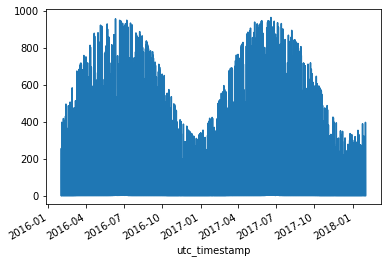

In [ ]:
df['radiation_surface'].plot()
plt.show()

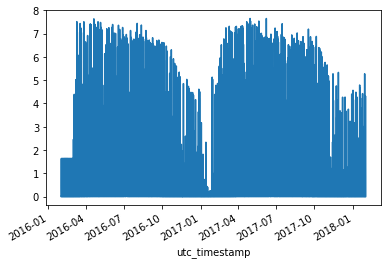

In [ ]:
df['DE_KN_residential6_pv'].plot()
plt.show()

***Autocorrelation check***

https://machinelearningmastery.com/autoregression-models-time-series-forecasting-python/

https://machinelearningmastery.com/make-predictions-time-series-forecasting-python/

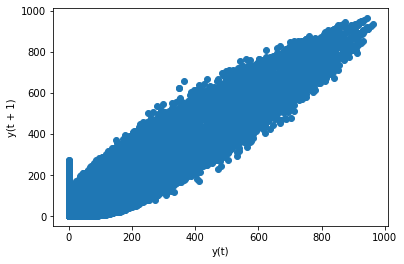

In [ ]:
from pandas.plotting import lag_plot

lag_plot(df['radiation_surface'])
plt.show()

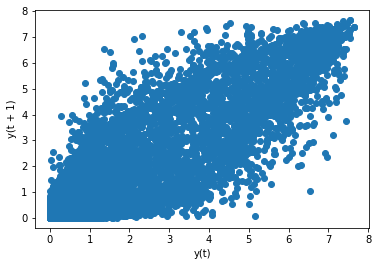

In [ ]:
lag_plot(df['DE_KN_residential6_pv'])
plt.show()

In [ ]:
from pandas import DataFrame
from pandas import concat
from matplotlib import pyplot

series = df['radiation_surface']
values = DataFrame(series.values)
dataframe = concat([values.shift(1), values], axis=1)
dataframe.columns = ['t-1', 't+1']
result = dataframe.corr()
print("autocorrelation for irradiance",result)
print()

series2 = df['DE_KN_residential6_pv']
values2 = DataFrame(series2.values)
dataframe2 = concat([values2.shift(1), values2], axis=1)
dataframe2.columns = ['t-1', 't+1']
result2 = dataframe2.corr()
print("autocorrelation for solar output",result2)

autocorrelation for irradiance           t-1       t+1
t-1  1.000000  0.935115
t+1  0.935115  1.000000

autocorrelation for solar output          t-1      t+1
t-1  1.00000  0.88927
t+1  0.88927  1.00000


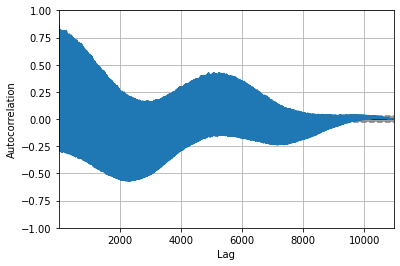

In [ ]:
from pandas.plotting import autocorrelation_plot

autocorrelation_plot(df['radiation_surface'])
pyplot.show()

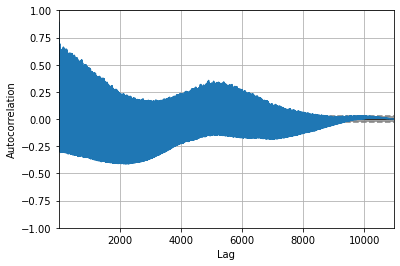

In [ ]:
autocorrelation_plot(df['DE_KN_residential6_pv'])
pyplot.show()

# the swing in positive and negative correlation indicate that the temperature values change across summer and winter seasons each previous year.

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


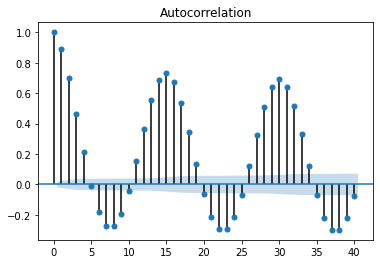

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(df['DE_KN_residential6_pv'], lags = 40)
pyplot.show()


# Persistence model

Test MSE: 4543.419


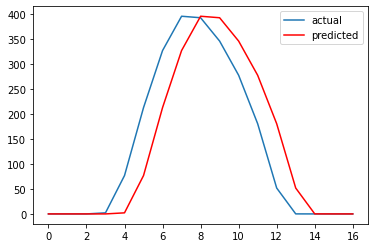

In [ ]:
from pandas import DataFrame
from pandas import concat
from matplotlib import pyplot
from sklearn.metrics import mean_squared_error


# create lagged dataset
values = DataFrame(df['radiation_surface'])
dataframe = concat([values.shift(1), values], axis=1)
dataframe.columns = ['t-1', 't+1']

# split into train and test sets
X = dataframe.values
train, test = X[1:len(X)-17], X[len(X)-17:]
train_X, train_y = train[:,0], train[:,1]
test_X, test_y = test[:,0], test[:,1]
 
# persistence model
def model_persistence(x):
	return x
 
# walk-forward validation
predictions = list()
for x in test_X:
	yhat = model_persistence(x)
	predictions.append(yhat)
test_score = mean_squared_error(test_y, predictions)
print('Test MSE: %.3f' % test_score)
# plot predictions vs expected
pyplot.plot(test_y)
pyplot.plot(predictions, color='red')
plt.legend(['actual', 'predicted'])
pyplot.show()

#something is wrong? why MSE becomes zero? too many zero values? and MSE looks too high

#Autoregression model

In [ ]:
pip install statsmodels --upgrade

     |████████████████████████████████| 9.8 MB 4.2 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


Coefficients: [ 3.35877404e+00  1.62721499e+00 -9.29715932e-01  2.79192919e-01
 -1.12399310e-01  4.10731285e-02 -2.67799239e-02  3.89288572e-02
 -3.62837074e-02  3.79068006e-02 -2.40293759e-02  1.70184224e-02
  6.09501852e-03  2.87938049e-02 -3.09268790e-02  4.37063574e-01
 -7.11616313e-01  4.23556585e-01 -1.62146427e-01  5.53166672e-02
 -1.48738629e-02  1.47895466e-03  4.65577471e-03  2.58234331e-03
 -2.93598412e-02  1.75679999e-02 -1.01986414e-02  4.95152212e-03
  5.64707408e-02 -4.93656607e-03]
predicted=5.165420, expected=0.000000
predicted=12.321759, expected=0.000000
predicted=22.959707, expected=0.000000
predicted=36.410540, expected=2.139000
predicted=69.235296, expected=76.736000
predicted=120.824374, expected=212.643000
predicted=177.893055, expected=326.733000
predicted=215.991562, expected=395.363000
predicted=253.693229, expected=392.363000
predicted=240.763475, expected=345.674000
predicted=204.153989, expected=277.277000
predicted=136.639370, expected=180.379000
predicte

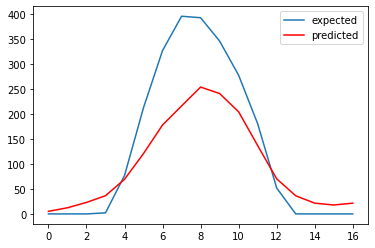

In [ ]:
# create and evaluate a static autoregressive model
from pandas import read_csv
from matplotlib import pyplot
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error
from math import sqrt


series = df['radiation_surface']
# split dataset
X = series.values
train, test = X[1:len(X)-17], X[len(X)-17:]
# train autoregression
model = AutoReg(train, lags=29)
model_fit = model.fit()
print('Coefficients: %s' % model_fit.params)
# make predictions
predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
for i in range(len(predictions)):
	print('predicted=%f, expected=%f' % (predictions[i], test[i]))
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot results
pyplot.plot(test)
pyplot.plot(predictions, color='red')
plt.legend(['expected','predicted'])
pyplot.show()

#conclusion: the model does not learn zeros

Coefficients: [ 8.62496437e-02  9.37916401e-01 -9.90430328e-02 -3.37085756e-02
 -2.17084196e-02 -2.85016376e-02  6.00829584e-03 -1.85173987e-02
  1.09126090e-02 -6.35557151e-04  1.93850457e-02 -1.09036200e-03
  1.57548638e-02  6.01983529e-02  6.58414806e-02  4.00944469e-02
 -3.48331631e-02 -3.61134741e-02 -1.14100642e-02  5.55442225e-03
 -5.71470186e-03 -6.36672668e-03  3.03043631e-03 -1.30456153e-02
 -4.59390074e-03 -3.27122991e-03  1.89169640e-02 -1.54724357e-02
  2.35674325e-02  7.55246871e-02]
predicted=-0.018149, expected=0.000000
predicted=0.019003, expected=0.000000
predicted=0.046907, expected=0.000000
predicted=0.171382, expected=0.000000
predicted=0.337532, expected=0.143000
predicted=0.751102, expected=0.816000
predicted=1.269715, expected=2.775000
predicted=1.648487, expected=2.394000
predicted=1.972770, expected=4.316000
predicted=2.100619, expected=3.595000
predicted=2.056064, expected=0.944000
predicted=1.736464, expected=1.400000
predicted=1.301239, expected=0.286000
pr

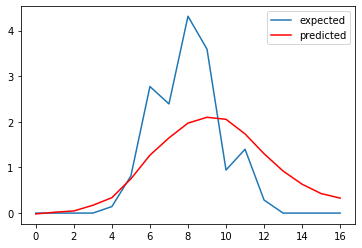

In [ ]:
series = df['DE_KN_residential6_pv']
# split dataset
X = series.values
train, test = X[1:len(X)-17], X[len(X)-17:]
# train autoregression
model = AutoReg(train, lags=29)
model_fit = model.fit()
print('Coefficients: %s' % model_fit.params)
# make predictions
predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
for i in range(len(predictions)):
	print('predicted=%f, expected=%f' % (predictions[i], test[i]))
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot results
pyplot.plot(test)
pyplot.plot(predictions, color='red')
plt.legend(['expected','predicted'])
pyplot.show()

#conclusion: the model does not spikes 

predicted=-0.018149, expected=0.000000
predicted=0.036025, expected=0.000000
predicted=0.027287, expected=0.000000
predicted=0.128657, expected=0.000000
predicted=0.181683, expected=0.143000
predicted=0.587097, expected=0.816000
predicted=1.357298, expected=2.775000
predicted=3.065055, expected=2.394000
predicted=2.530099, expected=4.316000
predicted=4.177550, expected=3.595000
predicted=3.167787, expected=0.944000
predicted=0.409122, expected=1.400000
predicted=0.978542, expected=0.286000
predicted=-0.083532, expected=0.000000
predicted=-0.126052, expected=0.000000
predicted=-0.033142, expected=0.000000
predicted=0.054626, expected=0.000000
Test RMSE: 0.857


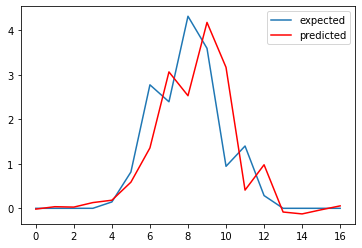

In [ ]:
X = df['DE_KN_residential6_pv'].values
train, test = X[1:len(X)-17], X[len(X)-17:]

# train autoregression
window = 29
model = AutoReg(train, lags=29)
model_fit = model.fit()
coef = model_fit.params
# walk forward over time steps in test
history = train[len(train)-window:]
history = [history[i] for i in range(len(history))]
predictions = list()
for t in range(len(test)):
	length = len(history)
	lag = [history[i] for i in range(length-window,length)]
	yhat = coef[0]
	for d in range(window):
		yhat += coef[d+1] * lag[window-d-1]
	obs = test[t]
	predictions.append(yhat)
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot
pyplot.plot(test)
pyplot.plot(predictions, color='red')
plt.legend(['expected','predicted'])
pyplot.show()

# Multivariate time series forecasting – Vector Auto Regression (VAR).

https://www.analyticsvidhya.com/blog/2018/09/multivariate-time-series-guide-forecasting-modeling-python-codes/

In [ ]:
#checking stationarity
from statsmodels.tsa.vector_ar.vecm import coint_johansen

df2= df[['DE_KN_residential6_pv','radiation_surface']]

#in the next iteration, I would drop another and check the eigenvalues
coint_johansen(df2,-1,1).eig

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


array([0.18037599, 0.13967902])

In [ ]:
# df2['Date_Time'] = pd.to_datetime(df.index , format = '%d/%m/%Y %H.%M.%S')
# #data = df2.drop(['Date_Time'], axis=1)
# data.index = df2.Date_Time

# data.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,DE_KN_residential6_pv,radiation_surface
Date_Time,,
2016-02-01 05:00:00+00:00,0.000,0.000
2016-02-01 06:00:00+00:00,0.000,0.467
2016-02-01 07:00:00+00:00,0.000,31.309
2016-02-01 08:00:00+00:00,0.038,112.503
2016-02-01 09:00:00+00:00,0.607,208.440


In [ ]:
len(df2)

0.8 * len(df2)

8772.0

In [ ]:
#creating the train and validation set
train = df2[:int(0.8*(len(df2)))]
valid = df2[int(0.8*(len(df2))):]

df2.head()
df2.info()
train.head()
print(type(train))

#fit the model
from statsmodels.tsa.vector_ar.var_model import VAR
from statsmodels.tsa.vector_ar.var_model import forecast

model = VAR(endog=train)
model_fit = model.fit()
model_fit.summary()

print(model_fit.params)
#print(model_fit)

# # make prediction on validation
prediction = model_fit.forecast(model.y, steps=len(valid))

print(prediction)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10965 entries, 2016-02-01 05:00:00+00:00 to 2018-01-31 19:00:00+00:00
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   DE_KN_residential6_pv  10965 non-null  float64
 1   radiation_surface      10965 non-null  float64
dtypes: float64(2)
memory usage: 257.0 KB
<class 'pandas.core.frame.DataFrame'>
                          DE_KN_residential6_pv  radiation_surface
const                                 -0.135616          13.572917
L1.DE_KN_residential6_pv               0.525221         -31.026343
L1.radiation_surface                   0.003612           1.155918
[[  1.11838834 149.88829242]
 [  0.99312013 152.13200529]
 [  0.93543007 158.61216794]
 ...
 [  1.84509345 280.10595794]
 [  1.84509345 280.10595794]
 [  1.84509345 280.10595794]]


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: FutureWarning: y is a deprecated alias for endog, will be removed in version 0.11.0


In [ ]:
#converting predictions to dataframe
pred = pd.DataFrame(index=range(0,len(prediction)),columns=df2.columns)
for j in range(0,2):
    for i in range(0, len(prediction)):
       pred.iloc[i][j] = prediction[i][j]

#check rmse
for i in df2.columns:
    print('mse value for', i, 'is : ', mean_squared_error(pred[i], valid[i]))

mse value for DE_KN_residential6_pv is :  3.376257564348511
mse value for radiation_surface is :  48545.97830772812


In [ ]:
#make final predictions
model = VAR(endog=data)
model_fit = model.fit()
yhat = model_fit.forecast(model.y, steps=1)
print(yhat)

#first value is solar output - can't be minus. Check dataset

[[-0.10196451 12.3413057 ]]


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:595: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: y is a deprecated alias for endog, will be removed in version 0.11.0
  after removing the cwd from sys.path.


In [ ]:
model.y

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: y is a deprecated alias for endog, will be removed in version 0.11.0
  """Entry point for launching an IPython kernel.


array([[ 0.   ,  0.   ],
       [ 0.   ,  0.467],
       [ 0.   , 31.309],
       ...,
       [ 0.   ,  0.   ],
       [ 0.   ,  0.   ],
       [ 0.   ,  0.   ]])